In [86]:
%%capture
import sys
import json
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install scipy
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import matplotlib.ticker
import csv

In [4]:
def read_json(file_name):
    with open(file_name) as json_file:
        return json.load(json_file)
    
def read_csv(file_name, delimiter, key_index, skip_first = False):
    with open(file_name, newline='') as csvfile:
        res = {}
        if skip_first is True:
            csv_file = csv.reader(csvfile, delimiter=delimiter, quotechar='"')
            next(csv_file)
        else:
            csv_file = csv.reader(csvfile, delimiter=delimiter, quotechar='"')
            
        for row in csv_file:
            if key_index is False:
                res[row[key_index]] = row   
            else:
                res[int(row[key_index])] = row   
        return res

def createGasVolume():
    volume_raw = read_json('uniswap_daydata.json')
    gas_raw = read_csv('export-AvgGasPrice.csv', ',', 1)
    timestamp = []
    volume = []
    gas = []
    
    for entry in volume_raw:
        timestamp.append(gas_raw[entry["date"]][0])
        volume.append(float(entry["dailyVolumeUSD"]) / 1000000)
        gas.append(int(gas_raw[entry["date"]][2]) / 1000000000)

    fig, ax1 = plt.subplots(figsize=(10, 4))
    color = 'tab:blue'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Daily trading volume in M USD', color=color)
    ax1.plot(timestamp, volume, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:red'
    ax2.set_ylabel('Average Daily Gas Price in Gwei', color=color)  # we already handled the x-label with ax1
    ax2.plot(timestamp, gas, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.savefig('gas_volume.png')
    plt.show()
    
# createGasVolume()

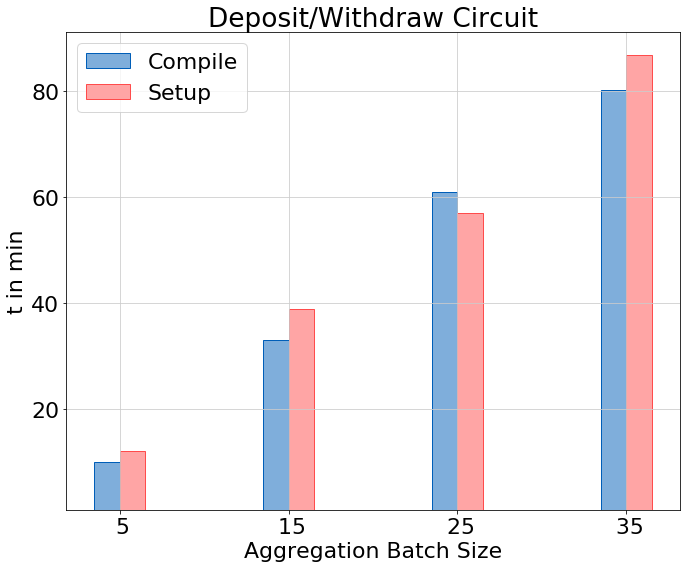

In [182]:
def createCompileSetupTime(filename):
    data = read_csv(filename + '.csv', ',', False, True)
    comp = []
    setup = []
    label = []
    for result in data:
        comp.append(int(data[result][2]) / 60)
        setup.append(int(data[result][4]) / 60)
        label.append(data[result][1])
    x = np.arange(len(label))  # the label locations
    width = 0.15  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 8))
    plt.rcParams.update({'font.size': 22})
    rects1 = ax.bar(x - width/2, comp, width, label='Compile', edgecolor='#005eb8', color='#7faedb')
    rects2 = ax.bar(x + width/2, setup, width, label='Setup', edgecolor='#ff4c4c', color='#ffa5a5')
    ax.set_ylabel('t in min')
    ax.set_xticks(x)
    ax.set_xlabel('Aggregation Batch Size')
    ax.set_xticklabels(label)
    ax.legend()
#     ax.semilogy(np.exp(0 / max(setup)))
    ax.set_ylim(ymin=1)
    fig.tight_layout()
    plt.title("Deposit/Withdraw Circuit")
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.color'] = "#cccccc"
    plt.savefig(filename + '-compile-setup-time.png', bbox_inches = 'tight')
    plt.show()
createCompileSetupTime("results_final_dep")

[60, 164, 277, 405]


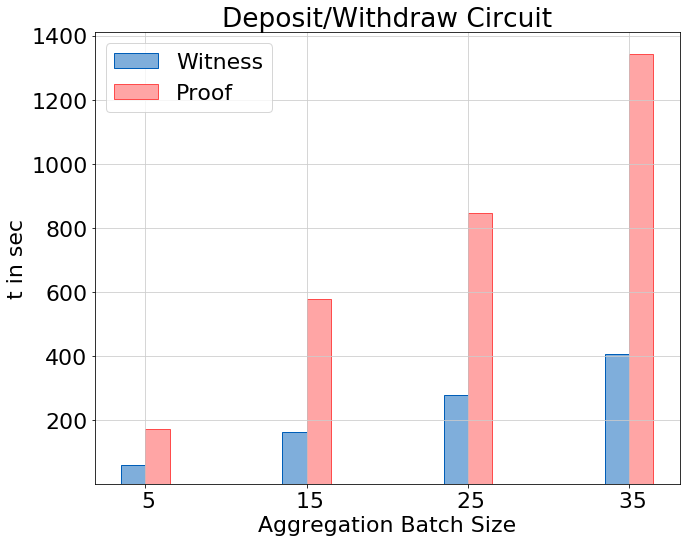

In [189]:
def createWitnessProofTime(filename):
    data = read_csv(filename + '.csv', ',', False, True)
    witness = []
    proof = []
    label = []
    for result in data:
        witness.append(int(data[result][6]))
        proof.append(int(data[result][8]))
        label.append(data[result][1])
    x = np.arange(len(label))  # the label locations
    width = 0.15  # the width of the bars
    
    print(witness)

    fig, ax = plt.subplots(figsize=(10, 8))
    plt.rcParams.update({'font.size': 22})
    rects1 = ax.bar(x - width/2, witness, width, label='Witness', edgecolor='#005eb8', color='#7faedb')
    rects2 = ax.bar(x + width/2, proof, width, label='Proof', edgecolor='#ff4c4c', color='#ffa5a5')
    ax.set_ylabel('t in sec')
    ax.set_xticks(x)
    ax.set_xlabel('Aggregation Batch Size')
    ax.set_xticklabels(label)
    ax.legend()
#     plt.title("")
#     ax.semilogy(np.exp(0 / max(proof)))
    plt.title("Deposit/Withdraw Circuit")
    ax.set_ylim(ymin=1)
    fig.tight_layout()
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.color'] = "#cccccc"
    plt.savefig(filename + '-witness-proof-time.png', bbox_inches = 'tight')
    plt.show()
createWitnessProofTime("results_final_dep")

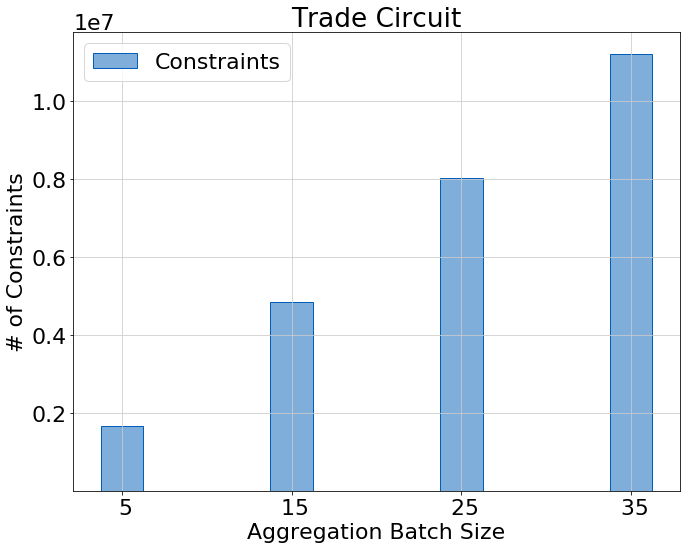

In [205]:
def createConstraints(filename):
    data = read_csv(filename + '.csv', ',', False, True)
    constraints = []
    label = []
    for result in data:
        constraints.append(int(data[result][-1]))
        label.append(data[result][1])
    x = np.arange(len(label))  # the label locations
    width = 0.25  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 8))
    plt.rcParams.update({'font.size': 22})
    rects1 = ax.bar(x, constraints, width, label='Constraints', edgecolor='#005eb8', color='#7faedb')
#     rects2 = ax.bar(x + width/2, setup, width, label='Setup', edgecolor='#ff4c4c', color='#ffa5a5')
    ax.set_ylabel('# of Constraints')
    ax.set_xticks(x)
    ax.set_xlabel('Aggregation Batch Size')
    ax.set_xticklabels(label)
    ax.legend()
#     ax.semilogy(np.exp(0 / max(constraints)))
    ax.set_ylim(ymin=1)
    fig.tight_layout()
    plt.title("Trade Circuit")
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.color'] = "#cccccc"
    plt.savefig(filename + '-constraints.png', bbox_inches = 'tight')
    plt.show()
createConstraints("results_final_trade")

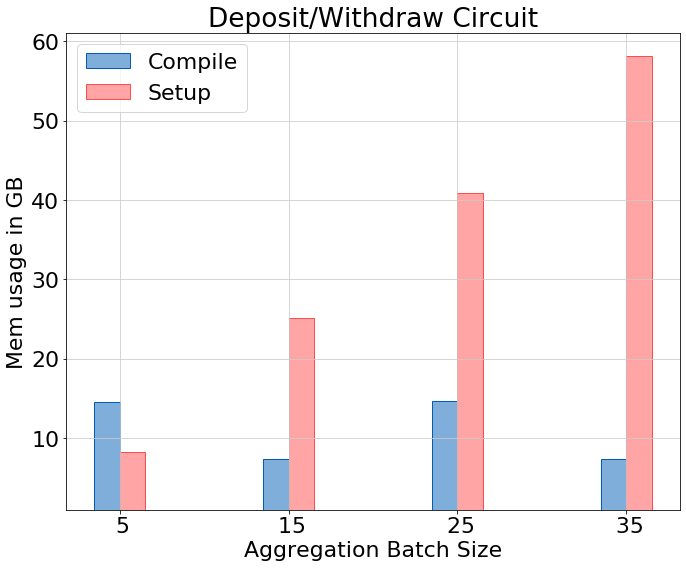

In [191]:
def createMemUsgCompileSetup(filename):
    data = read_csv(filename + '.csv', ',', False, True)
    comp = []
    setup = []
    label = []
    for result in data:
        comp.append(int(data[result][3]) / 1000000)
        setup.append(int(data[result][5]) / 1000000)
        label.append(data[result][1])
    x = np.arange(len(label))  # the label locations
    width = 0.15  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 8))
    plt.rcParams.update({'font.size': 22})
    rects1 = ax.bar(x - width/2, comp, width, label='Compile', edgecolor='#005eb8', color='#7faedb')
    rects2 = ax.bar(x + width/2, setup, width, label='Setup', edgecolor='#ff4c4c', color='#ffa5a5')
    ax.set_ylabel('Mem usage in GB')
    ax.set_xticks(x)
    ax.set_xlabel('Aggregation Batch Size')
    ax.set_xticklabels(label)
    ax.legend()
#     ax.semilogy(np.exp(0 / max(comp)))
    ax.set_ylim(ymin=1)
    fig.tight_layout()
    plt.title("Deposit/Withdraw Circuit")
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.color'] = "#cccccc"
    plt.savefig(filename + '-compile-setup-mem.png', bbox_inches = 'tight')
    plt.show()
createMemUsgCompileSetup("results_final_dep")

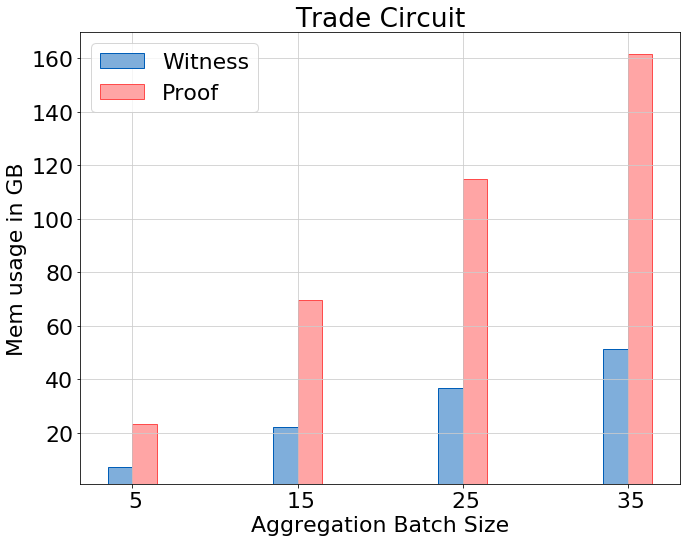

In [193]:
def createMemUsgWitnessProof(filename):
    data = read_csv(filename + '.csv', ',', False, True)
    witness = []
    proof = []
    label = []
    for result in data:
        witness.append(int(data[result][7]) / 1000000)
        proof.append(int(data[result][9]) / 1000000)
        label.append(data[result][1])
    x = np.arange(len(label))  # the label locations
    width = 0.15  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 8))
    plt.rcParams.update({'font.size': 22})
    rects1 = ax.bar(x - width/2, witness, width, label='Witness', edgecolor='#005eb8', color='#7faedb')
    rects2 = ax.bar(x + width/2, proof, width, label='Proof', edgecolor='#ff4c4c', color='#ffa5a5')
    ax.set_ylabel('Mem usage in GB')
    ax.set_xticks(x)
    ax.set_xlabel('Aggregation Batch Size')
    ax.set_xticklabels(label)
    ax.legend()
#     ax.semilogy(np.exp(0 / max(proof)))
    plt.title("Trade Circuit")
    ax.set_ylim(ymin=1)
    fig.tight_layout()
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.color'] = "#cccccc"
    plt.savefig(filename + '-witness-proof-mem.png')
    plt.show()
createMemUsgWitnessProof("results_final_trade")

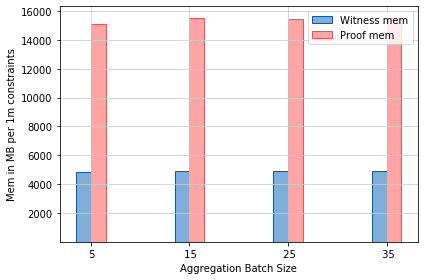

In [21]:
def ramPerMillionConstraints(filename):
    data = read_csv(filename + '.csv', ',', False, True)
    witness_mb_per_1m_const = []
    proof_mb_per_1m_const = []
    constraints = []
    label = []
    for result in data:
        constraint = int(data[result][-1]) / 1000000
        witness_mb_per_1m_const.append((int(data[result][7]) / 1000) / constraint)
        proof_mb_per_1m_const.append((int(data[result][9]) / 1000) / constraint)
        label.append(data[result][1])

    x = np.arange(len(label))  # the label locations
    width = 0.15  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, witness_mb_per_1m_const, width, label='Witness mem', edgecolor='#005eb8', color='#7faedb')
    rects2 = ax.bar(x + width/2, proof_mb_per_1m_const, width, label='Proof mem', edgecolor='#ff4c4c', color='#ffa5a5')
    ax.set_ylabel('Mem in MB per 1m constraints')
    ax.set_xticks(x)
    ax.set_xlabel('Aggregation Batch Size')
    ax.set_xticklabels(label)
    ax.legend()
#     ax.semilogy(np.exp(0 / max(proof_mb_per_1m_const)))
    ax.set_ylim(ymin=1)
    fig.tight_layout()
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.color'] = "#cccccc"
    plt.savefig(filename + '-constraints_gb_proof_witness.png')
    plt.show()
ramPerMillionConstraints('results_final_dep')

[27604.516666666666, 29615.067073170732, 29088.34296028881, 27797.706172839506]
[9685.795321637426, 8417.454072790295, 9512.95277449823, 8382.778108711838]


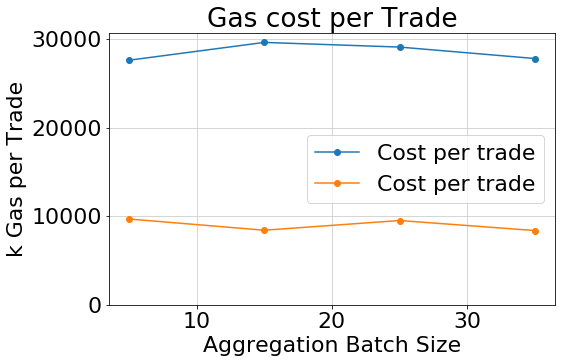

In [215]:
def constraintsPerSec(filename):
    data = read_csv(filename + '.csv', ',', False, True)
    witness_const_per_sec = []
    proof_const_per_sec = []
    label = []
    for result in data:
        t_witness = int(data[result][6])
        t_proof =  int(data[result][8])
        constraints = int(data[result][-1])
        witness_const_per_sec.append(constraints / t_witness)
        proof_const_per_sec.append(constraints / t_proof)
        label.append(int(data[result][1]))
    print(witness_const_per_sec)
    print(proof_const_per_sec)
#     x = np.arange(len(label))  # the label locations
#     width = 0.15  # the width of the bars

#     fig, ax = plt.subplots()
#     print(label)
#     rects1 = ax.plot(witness_const_per_sec, width, label='Constraints/sec', edgecolor='#005eb8', color='#7faedb')
# #     rects2 = ax.plot(proof_const_per_sec, width, label='Constraints/sec', edgecolor='#ff4c4c', color='#ffa5a5')
#     ax.set_ylabel('Constraints processed per sec')
#     ax.set_xticks(x)
#     ax.set_xlabel('Aggregation Batch Size')
#     ax.set_xticklabels(label)
#     ax.legend()
# #     ax.semilogy(np.exp(0 / max(proof_mb_per_1m_const)))
#     ax.set_ylim(ymin=1)
#     fig.tight_layout()
#     plt.rcParams['axes.grid'] = True
#     plt.rcParams['grid.color'] = "#cccccc"
#     plt.savefig(filename + '-constraints_per_sec_proof_witness.png')
#     plt.show()
    fig1, ax1 = plt.subplots(figsize=(8, 5))
#     ax1.axhline(y=167,xmin=0,xmax=1811,c="red",linewidth=2,zorder=1, label = "Break even point")
    ax1.plot(label, witness_const_per_sec, 'o-', label="Cost per trade")
    ax1.plot(label, proof_const_per_sec, 'o-', label="Cost per trade")
    
#     ax1.set_xscale('log')
    ax1.set_xlabel('Aggregation Batch Size')
    ax1.set_ylabel('k Gas per Trade')
#     ax1.set_xticks([1, 2, 3, 5, 10, 15, 25, 35, 50, 100, 200, 500, 1500])
#     ax1.set_yticks([25, 75, 125, 167, 200, 300, 400, 500])
#     ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#     ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax1.set_ylim(ymin=0)
    plt.legend()
    plt.title("Gas cost per Trade")
    plt.savefig(filename + '.png')
    plt.show()
constraintsPerSec('results_final_dep')

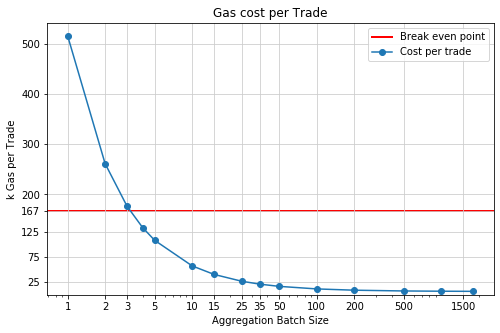

In [169]:
def gas_cost_curve_eth(filename):
    data = read_csv(filename + '.csv', ',', False, True)
    eth_per_trade = []
    token_per_trade = []
    proof_const_per_sec = []
    label = []
    for result in data:
        eth_per_trade.append(int(data[result][4]))
        token_per_trade.append(int(data[result][3]) / 1000)
        label.append(int(data[result][0]))
    
    fig1, ax1 = plt.subplots(figsize=(8, 5))
    ax1.axhline(y=167,xmin=0,xmax=1811,c="red",linewidth=2,zorder=1, label = "Break even point")
    ax1.plot(label, token_per_trade, 'o-', label="Cost per trade")
    
    ax1.set_xscale('log')
    ax1.set_xlabel('Aggregation Batch Size')
    ax1.set_ylabel('k Gas per Trade')
    ax1.set_xticks([1, 2, 3, 5, 10, 15, 25, 35, 50, 100, 200, 500, 1500])
    ax1.set_yticks([25, 75, 125, 167, 200, 300, 400, 500])
    ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax1.set_ylim(ymin=0)
    plt.legend()
    plt.title("Gas cost per Trade")
    plt.savefig(filename + '.png')
    plt.show()

gas_cost_curve_eth("trade_cost")

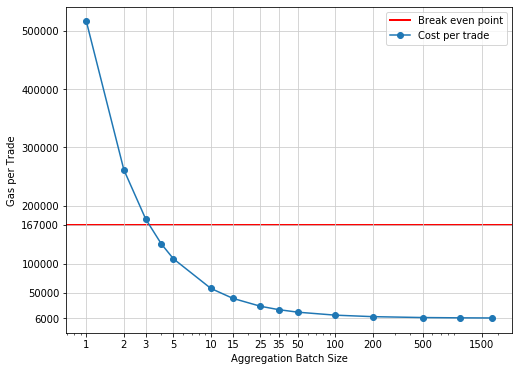

In [168]:
def gas_cost_curve_token (filename):
    data = read_csv(filename + '.csv', ',', False, True)
    eth_per_trade = []
    token_per_trade = []
    proof_const_per_sec = []
    label = []
    for result in data:
        token_per_trade.append(int(data[result][3]))
        label.append(int(data[result][0]))
    
    fig1, ax1 = plt.subplots(figsize=(8, 6))
    ax1.axhline(y=167000,xmin=0,xmax=1811,c="red",linewidth=2,zorder=1, label = "Break even point")
    ax1.plot(label, token_per_trade, 'o-', label="Cost per trade")
    
    ax1.set_xscale('log')
    ax1.set_xlabel('Aggregation Batch Size')
    ax1.set_ylabel('Gas per Trade')
    ax1.set_xticks([1, 2, 3, 5, 10, 15, 25, 35, 50, 100, 200, 500, 1500])
    ax1.set_yticks([6000, 50000, 100000, 167000, 200000, 300000, 400000, 500000])
    ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    plt.legend()
    plt.savefig(filename + '-token.png')
    plt.show()

gas_cost_curve_token("trade_cost")